<a href="https://colab.research.google.com/github/fabiocceruti/Identificacao_Fraude_Cartao_Credito_ML/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

Além destas colunas, o *dataset* possui as seguintes variáveis:
* **Time**: É o número de segundso entre a transação e primeira operação no banco;
* **Amount**: Montante da transação;
* **Class**: 1 para transação fraudulenta e 0 para lícita.

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Pacotes do Sklearn para trabalhar com modelos de ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [3]:
#Biblioteca para balancear a amostra
from imblearn.under_sampling import RandomUnderSampler

#Ignorando warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [4]:
#Link do arquivo
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise exploratória

Antes de iniciarmos a aplicação dos modelos preditivos de machine learning, vamos realizar uma análise exploratória dos dados para verificar a necessidade de alguma intervenção.

Primeiramente, verificaremos quantos dados e variáveis possuem no *dataset*.

In [5]:
#Imprimindo a quantidade de dados e variáveis
print("Quantidade de dados: ", df.shape[0])
print("Quantidade de variáveis: ", df.shape[1])

Quantidade de dados:  284807
Quantidade de variáveis:  31


Vamos avaliar as 5 primeiras e últimas linhas com a ideia de entender como os dados estão organizados.

In [6]:
#Imprimindo as 5 primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#Imprimindo as 5 últimas linhas
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Vamos avaliar os tipos das variáveis do *dataset*.

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Podemos notar que as variáveis estão classificadas em dois tipos:
* **float**: número inteiro;
* **int**: número inteiro.

Vamos avaliar se existe valores ausentes na amostra.

In [9]:
#Verificando se existe valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Como podemos avaliar, não existe valores ausentes, o que é um ponto positivo para o estudo, já que não será necessário qualquer intevenção nos dados em busca de contornar este problema.

Outro problema que podemos ter é o desbalanceamento dos dados, diante disto, vamos avaliar como está o balanceamento no *dataset*.

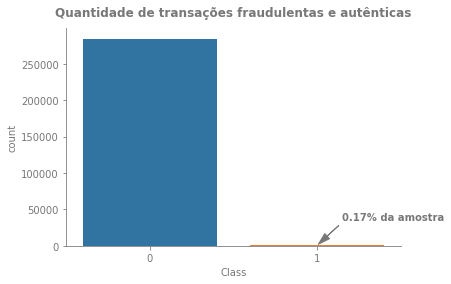

In [10]:
#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12
             }

#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots()

  #Criando o gráfico de countplot
  sns.countplot(x = 'Class', 
                data = df,
                ax = ax)
  
  #Exibindo o título
  ax.set_title("Quantidade de transações fraudulentas e autênticas")

  #Armazena o % da amostra
  percentual_fraud = round((df['Class'].value_counts()[1] / df.shape[0])*100,2)

  #Criar uma informação no gráfico
  ax.annotate(str(percentual_fraud) + "% da amostra", 
              xy = (1, df['Class'].value_counts()[1]), 
              xytext = (25,25), 
              color = "#787878",
              weight = 'bold', 
              textcoords='offset points',
              arrowprops=dict(color = '#787878',  shrink= 0.05, width = 0.01, headwidth = 7))

  #Exibindo o gráfico
  plt.show()


Como mostrado no gráfico, os dados relacionados com a variável alvo **Class** está desbalanceada, visto que apenas 0,17% dos dados totais estão relacionados com transações fraudulentas.

Isto gera um problema durante a predição do modelo de machine learning, porque é mais cômodo para o algoritmo classificar a maioria dos casos como autênticos. Diante disto, será necessário rebalancear amostra. Este passo será mostrado e explicado durante a fase de **preparando os dados**.

As variáveis V1 a V28 sofreram uma redução de dimensionalidade a partir da aplicação do algoritmo PCA, portanto, é difícil fazer uma análise a respeito delas, devido a perca de lastro com a realidade.

Com isso, focaremos as análises exploratórias em relação a variável **Time** e **Amount**.

O próximo passo é plotar um histograma da variável **Time** para transações fraudulentas e autênticas.


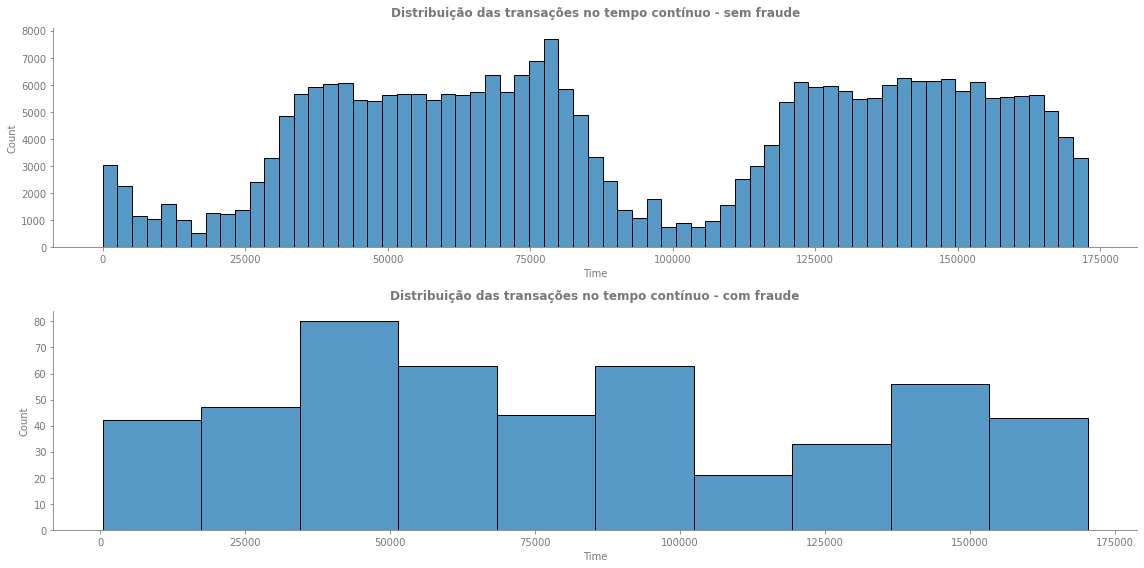

In [11]:
#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 8))

  #Construindo o histograma dos horários de transações autênticas
  sns.histplot( x = 'Time', 
               data = df.loc[ df['Class'] == 0 ], 
               ax = ax[0],
               kde = False)
  
  #Setando o título
  ax[0].set_title("Distribuição das transações no tempo contínuo - sem fraude")
  
  #Construindo o histograma dos horários de transações Fraude
  sns.histplot( x = 'Time', 
               data = df.loc[ df['Class'] == 1 ], 
               ax = ax[1],
               kde = False)
  
  #Setando o título
  ax[1].set_title("Distribuição das transações no tempo contínuo - com fraude")

  #Exibindo o gráfico
  fig.tight_layout()

O *dataset* está organizado por transações realizadas em um período de dois dias e a variável **Time** está em unidade de segundos contínuo. Portanto, apesar do gráfico plotado mostrar alguns insights a respeito dos períodos que ocorrem mais transações, o ideal seria trazer para uma visão diária e unificar os dois dias em apenas um.

Com isso, faremos uma conversão da variável **Time** para horas diárias. O próximo passo é criar uma função e aplicar no dataframe para conversão.

In [12]:
#Definindo uma função que convert o segundo em horas diárias
def ConvertInHourDay(time):

  #Define o segundos em uma hora
  SecondsOneHour = 60*60

  #Converte o segundos em horas diárias
  if (time <= (SecondsOneHour * 24)):
    TimeOneDay = time / SecondsOneHour
  else:
    TimeOneDay = (time / SecondsOneHour) - 24

  #Retorna o valor
  return round(TimeOneDay,4)

In [13]:
#Copiando o dataframe
df_time_day = df.copy()

#Aplicando a função de conversão no novo dataframe
df_time_day['Time'] = df_time_day['Time'].apply(ConvertInHourDay)

Após as conversões iremos avaliar as 5 primeiras e últimas linhas para verificar se ocorreu tudo conforme planejado.

In [14]:
#Imprimindo as 5 primeiras linhas
df_time_day.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.0003,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.0003,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.0006,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
#Imprimindo as 5 últimas linhas
df_time_day.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,23.9961,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,23.9964,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,23.9967,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,23.9967,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,23.9978,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Como podemos verificar, tais conversões ocorreram, conforme planejado.

Agora o próximo passo é refazer os histogramas com estas modificações.

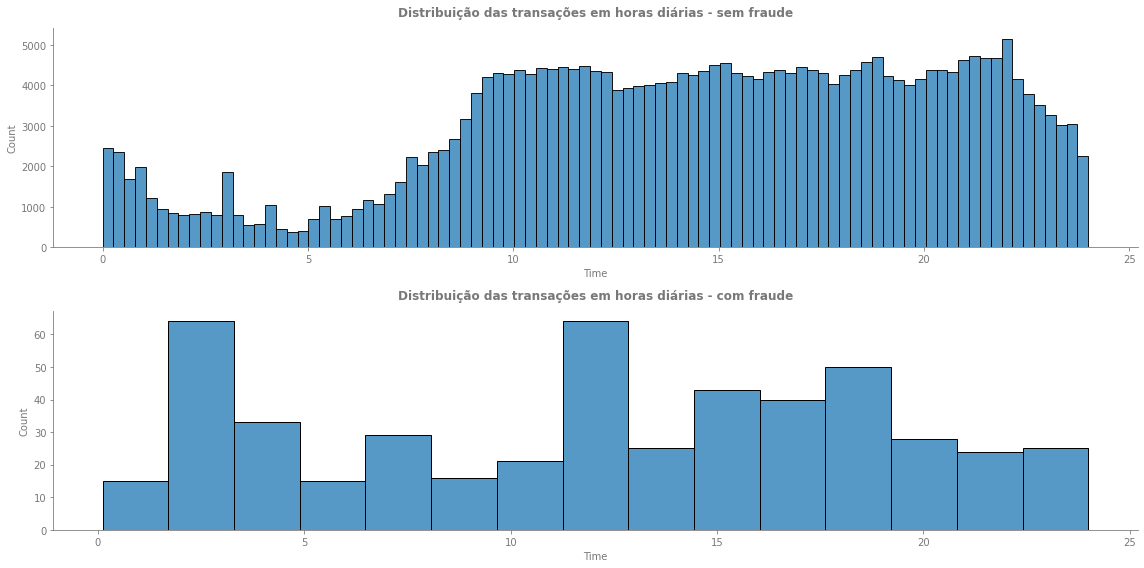

In [16]:
#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 8))

  #Construindo o histograma dos horários de transações autênticas
  sns.histplot( x = 'Time', 
               data = df_time_day.loc[ df_time_day['Class'] == 0 ], 
               ax = ax[0],
               kde = False)
  
  #Setando o título
  ax[0].set_title("Distribuição das transações em horas diárias - sem fraude")
  
  #Construindo o histograma dos horários de transações Fraude
  sns.histplot( x = 'Time', 
               data = df_time_day.loc[ df_time_day['Class'] == 1 ], 
               ax = ax[1],
               kde = False,
               bins = 15)
  
  #Setando o título
  ax[1].set_title("Distribuição das transações em horas diárias - com fraude")

  #Exibindo o gráfico
  fig.tight_layout()

Em relação ao histograma de transações autênticas, podemos concluir que a maioria das transações ocorrem entre o horário comercial e a noite quando as pessoas chegam em casa após um dia trabalho.

Em relação ao histograma de transações fraudulentas, conseguimos concluir que existem dois picos de períodos que ocorrem estas fraudes, geralmente cerca das 02:30 e 12:30.

O próximo passo é plotar um histograma da variável **Amount** para ambos tipos de transações.

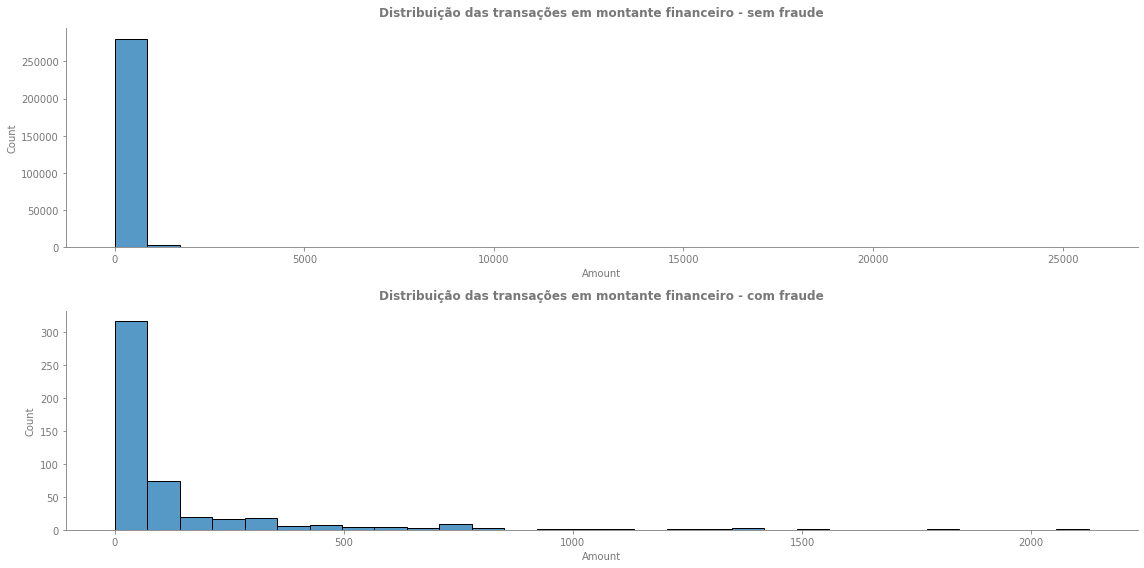

In [17]:
#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 8))

  #Construindo o histograma dos horários de transações autênticas
  sns.histplot( x = 'Amount', 
               data = df.loc[ df['Class'] == 0 ], 
               ax = ax[0],
               kde = False,
               bins = 30)
  
  #Setando o título
  ax[0].set_title("Distribuição das transações em montante financeiro - sem fraude")
  
  #Construindo o histograma dos horários de transações Fraude
  sns.histplot( x = 'Amount', 
               data = df.loc[ df['Class'] == 1 ], 
               ax = ax[1],
               kde = False,
               bins = 30)
  
  #Setando o título
  ax[1].set_title("Distribuição das transações em montante financeiro - com fraude")

  #Exibindo o gráfico
  fig.tight_layout()

Em relação ao primeiro histograma, conseguimos avaliar uma forte tendência de presença de outliers, devido a maior parte dos dados se cocentrarem no inicio.

Em relação ao segundo histograma, conseguimos concluir que a maior parte das transações fraudulentas são valores pequenos, pode ser uma estratégia para evitar bloqueios tanto por parte da instituição financeira quanto por parte do cliente.

Vamos avaliar a presença de outliers, plotando o boxplot para ambos os casos.



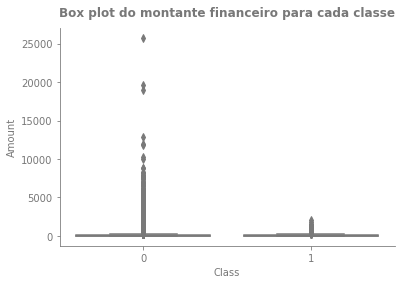

In [26]:
#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots()

  #Plotando o gráfico de boxplot
  sns.boxplot(x = 'Class',
              y = 'Amount',
              data = df,
              palette = 'vlag',
              ax = ax)
  
  #Setando o título
  ax.set_title("Box plot do montante financeiro para cada classe")
  
  #Exibindo o gráfico
  plt.show()

Como podemos observar, existe a presença de outliers em ambos tipos de transações. Porém, como o modelo de predição terá objetivo de avaliar se determinada operação é fraudulenta, a retirada de outliers pode enfraquecer o modelo para casos em que os valores monetário são altos.

O próximo passo é gerar uma matriz de correlação, através de uma heatmap, para avaliar a intensidade da relação entre as variáveis.

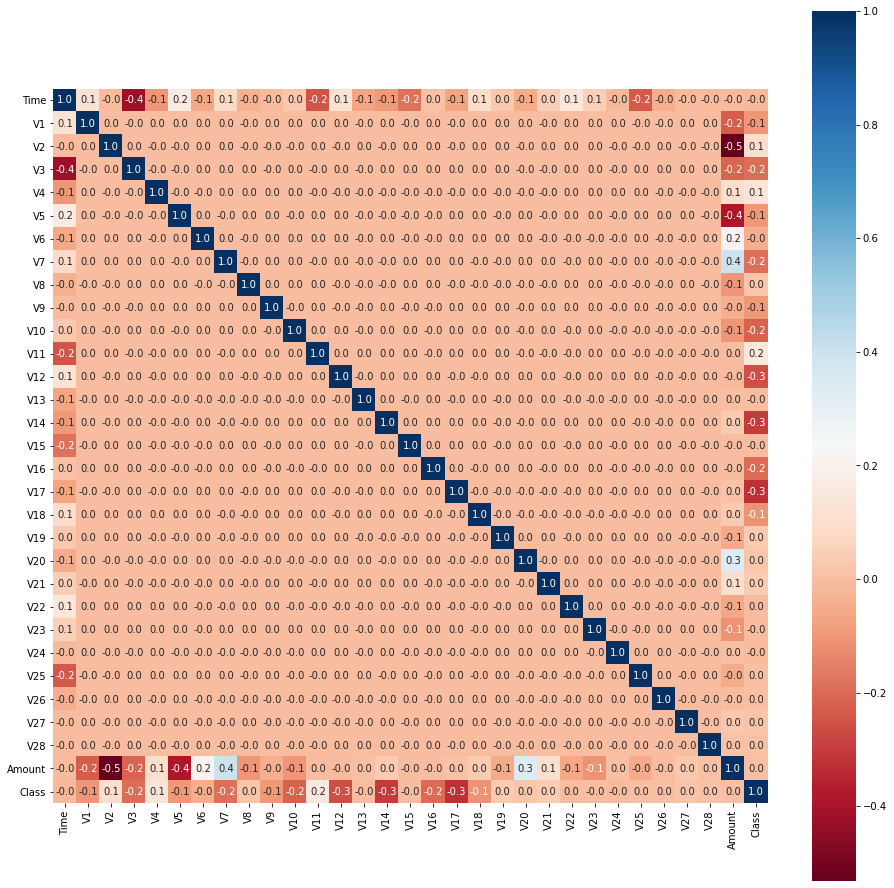

In [27]:
#Calculando a mariz de correlação
corr = df.corr()

#Instancinado a Figure e Axes
fig,ax = plt.subplots(figsize = (16,16))

#Plotando um heatmap da matriz de correlação
sns.heatmap(corr, 
            cmap='RdBu', 
            fmt='.1f', 
            square=True, 
            linecolor='white', 
            annot=True, 
            ax = ax);

Como podemos observar, nenhuma variável possui uma relação forte. A maior relação é de -0.5 entre a variável **Amount** e **V2**.

O próximo passo é preparar os dados para começarmos a aplicar os modelos de machine learning.

## Preparação dos Dados


Primeiramente, vamos padronizar os dados para mantê-los todos na mesma escala de valores. Alguns modelos como o de regressão logística não funciona bem para dados não padronizados.

In [29]:
#Padronizando os dados
#Instanciando o objeto StandarScaler()
scaler = StandardScaler()

#Padronizando a variável time
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

#Padronizando a variávl Amount
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

Vamos dividir os dados em uma matriz de features e um vetor de variável alvo. A primeira corresponde as variáveis independentes, ou seja, as que podem explicar se a transação é do tipo fraudulenta ou lícita. Enquanto que a segunda equivale a nossa variável que queremos prever através dos modelos de machine learning.

In [32]:
#Separar a Matriz de Features e Vetor Alvo
X = df.drop('Class', axis = 1) #Matriz Features
y = df['Class'] #Vetor Alvo

Vamos dividir os dados em teste e treino. Esta etapa visa criarmos um *dataset* para treinarmos o modelo e outro para aferirmos a performance da predição.

In [33]:
#Separando entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

O próximo passo é balancear os dados para evitar que a predição fique enviesada e gere uma perda de performance em relação o objetivo mais importante que é prever as fraudes.

Esta etapa pode ser feita por duas maneiras, conforme indicado por [Carlos Melo](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/):

>* Over-sampling: cria novas observações da classe minoritária a partir das informações contidas nos dados originais. Essa geração de novas entradas pode ser feita aleatoriamente com o auxílio de técnicas de clustering ou sinteticamente.
* Under-sampling: reduz o desbalanceamento do dataset focando na classe majoritária. Ou seja, elimina aleatoriamente entradas da classe com maior número de ocorrências.

Utilizaremos como base a técnica de **under-sampling**, devido a possibilidade de mantermos integralmente os dados originais associados a fraude.

In [34]:
#Balanceando a amostra
#Instanciando o objeto RandomUnderSampler()
rus = RandomUnderSampler()

#Rebalanceando a amostra
X_reb, y_reb = rus.fit_sample(X_train, y_train)


Vamos plotar o gráfico para verificar se os dados foram balanceados.

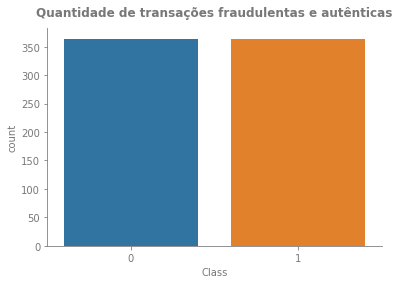

In [35]:
#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots()

  #Criando o gráfico de countplot
  sns.countplot(x = y_reb,
                ax = ax)
  
  #Setando o título
  ax.set_title("Quantidade de transações fraudulentas e autênticas")

  #Setando o título do eixo x
  ax.set_xlabel("Class")

  #Exibindo o gráfico
  plt.show()

Como podemos avaliar, os dados estão perfeitamente balanceados. Agora o próximo passo será aplicar os modelos de machine learning.

## Modelo de Machine Learning

O objetivo deste estudo de caso é prever se uma determinada transação pode ser considerada como fraudulenta ou lícita. Vale destacar que o mais importante é determinar o máximo de transações fraudulentas, mesmo que o modelo erre. 

Os modelos utilizados para resolver este problema são do tipo classificação, ou seja, lida com variáveis discretas ou rotuladas (Class: 0 ou 1).

Serão utilizado dois modelos para predição:
* Regressão Logística;
* Árvore de decisão.

Vamos iniciar aplicando o modelo de regressão logística.

In [36]:
#Regressão Logística
#Escolhendo e importando o modelo
from sklearn.linear_model import LogisticRegression 

#Instanciando o modelo
model_LR = LogisticRegression()

#Treinar o modelo
model_LR.fit(X_reb, y_reb)

#Prever com base no X_test
y_pred_LR = model_LR.predict(X_test)

O próximo passo é aplicar o modelo de árvore decisão. Porém, antes de iniciarmos, é importante destacar que para este modelo devemos informar como hiperparâmetro uma quantidade de nó (desdobramento da árvore) para evitarmos a possibilidade de overfitting do modelo.

Com o objetivo de definir uma quantidade de nó ótima, foi criado um loop para retornar o valor ideal a partir da métrica **Recall**. Esta métrica avalia a capacidade de prever corretamente fraudes dentro das transações fraudulentas ocorridas.

In [56]:
#Árvore de Decisão

#Importando a métrica para verificar a quantidade ótima
from sklearn.metrics import recall_score

#Escolhendo e importando o modelo
from sklearn.tree import DecisionTreeClassifier

#Aplicando um for para buscar a qtd de nós ótimos
for i in range(30): 

  #Instanciando o modelo
  model_DTC = DecisionTreeClassifier(max_depth = (i+1) , criterion = 'entropy')

  #Treinar o modelo
  model_DTC.fit(X_reb, y_reb)

  #Prever com base no X_test
  y_pred_DTC = model_DTC.predict(X_test)

  #recebendo o score da métrica recall para o modelo
  recall = recall_score(y_test, y_pred_DTC)

  #Fazendo as comparações para avaliar qual é a quantidade nós ótimo
  if (i == 0):
    recall_comp = recall
    qtd_nos =  i + 1
  
  elif (recall_comp < recall ):
    recall_comp = recall
    qtd_nos =  i + 1

print("A quantidade ótima de nó: ", qtd_nos)


A quantidade ótima de nó:  5


O próximo passo é aplicarmos a quantidade ótima de nós no nosso modelo de árvore de decisão.

In [43]:
#Instanciando o modelo
model_DTC = DecisionTreeClassifier(max_depth = qtd_nos , criterion = 'entropy')

#Treinar o modelo
model_DTC.fit(X_reb, y_reb)

#Prever com base no X_test
y_pred_DTC = model_DTC.predict(X_test)

Aplicado os dois modelos de decisão, o próximo passo é avaliarmos qual atenderia melhor o objetivo proposto para este estudo de caso. 

## Avaliar o desempenho do modelo

Vamos avaliar qual modelo consegue atender o objetivo proposto, levando em consideração as seguintes métricas:
* **Precision**: Capacidade prever um rótulo corretamente, por exemplo, o percentual de fraudes previstas corretamente.
* **Recall**: Capacidade de prever um rótulo dentro do universo daquela variável, por exemplo, o percentual de previsão de fraude em relação as fraudes ocorridas;
* **Acurracy**: A capacidade de prever todos rótulos corretamente.

Diante disso, vamos imprimir o relatório de métricas para cada modelo.

In [48]:
#Imprimindo os valores da métrica dos dois modelo p/ comparação
print("---------------------Regressão Logística-------------")
print(classification_report(y_test, y_pred_LR))
print("----------------Árvore de Decisão--------------------")
print(classification_report(y_test,y_pred_DTC))


---------------------Regressão Logística-------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71074
           1       0.06      0.95      0.12       128

    accuracy                           0.97     71202
   macro avg       0.53      0.96      0.55     71202
weighted avg       1.00      0.97      0.99     71202

----------------Árvore de Decisão--------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     71074
           1       0.02      0.94      0.04       128

    accuracy                           0.91     71202
   macro avg       0.51      0.92      0.50     71202
weighted avg       1.00      0.91      0.95     71202



Em relação as três métricas mencionadas, podemos concluir que o modelo de regressão logística apresenta uma performance melhor do que o de árvore de decisão. 

Dentre as métricas destacadas, a mais importante é a **Recall**, porque para este problema é necessário acertar o máximo de transações fraudulentas, independente da quantidade de casos lícitos previstos como fraudulentos.

Vamos plotar a matriz confusão para ambos os modelos com o objetivo de avaliarmos a quantidade de previsões versus ocorrências para cada classe de transação.

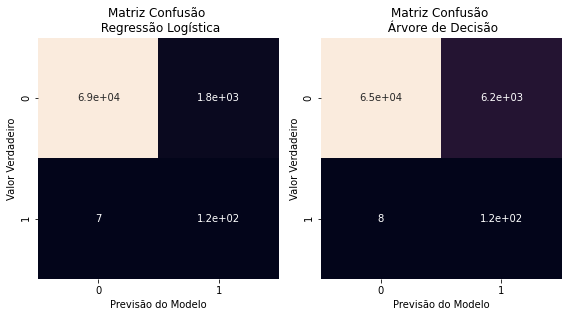

In [54]:
#Instanciando a figure e axes
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,8))

#Plotando a matriz de confusão em um heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_LR), 
            square=True, 
            annot=True, 
            cbar=False,
            ax = ax[0])

#Definindo o nome do eixo x
ax[0].set_xlabel("Previsão do Modelo")

#Definindo o nome do eixo y
ax[0].set_ylabel("Valor Verdadeiro")

#Definindo o título
ax[0].set_title("Matriz Confusão \n Regressão Logística")

#Plotando a matriz de confusão em um heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_DTC), 
            square=True, 
            annot=True, 
            cbar=False,
            ax = ax[1])

#Definindo o nome do eixo x
ax[1].set_xlabel("Previsão do Modelo")

#Definindo o nome do eixo y
ax[1].set_ylabel("Valor Verdadeiro")

#Definindo o título
ax[1].set_title("Matriz Confusão \n Árvore de Decisão")

fig.tight_layout()


## Conclusão

Os dados compilados de algumas empresas europérias de cartão crédito foram utilizados com o intuito de prever se uma determinada transação é fraudulenta ou lícita.

Os modelos de machine learning aplicados neste estudo de caso foram de Regressão Logística e Árvore de decisão. No qual, o primeiro apresentou uma performance melhor, conforme as métricas definidas para para avaliar se a capacidade do modelo de atender o objetivo proposto para o problema. 

É importante destacar que o mais importante é prever o máximo de fraudes, independente da quantidade de previsões erradas em relação a transações lícitas.